<a href="https://colab.research.google.com/github/Baronlegend27/academic-research-to-financial-freedom/blob/main/papers/Erb%2C%20C.%20B.%2C%20Harvey%2C%20C.%20R.%2C%20%26%20Viskanta%2C%20T.%20E.%20(2011).%20%22International%20diversification%20works%20(eventually).%22/Lost_Decade_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nominal Returns**

This notebook analyzes several major equity benchmarks to provide a clear view of global market trends. The S&P 500 tracks 500 large U.S. companies, reflecting the performance of the American stock market, while the Nikkei 225 represents 225 major firms listed on the Tokyo Stock Exchange, capturing trends in Japan’s economy. The MSCI Total World Index is a broad global index that includes thousands of stocks from both developed and emerging markets, providing a comprehensive snapshot of the global equity landscape. Similarly, VGTSX, the Vanguard Total International Stock Index Fund, invests in a diversified portfolio of international stocks across developed and emerging markets, covering large-, mid-, and small-cap companies outside the United States.

This first graph only takes into account the price.

[*********************100%***********************]  1 of 1 completed


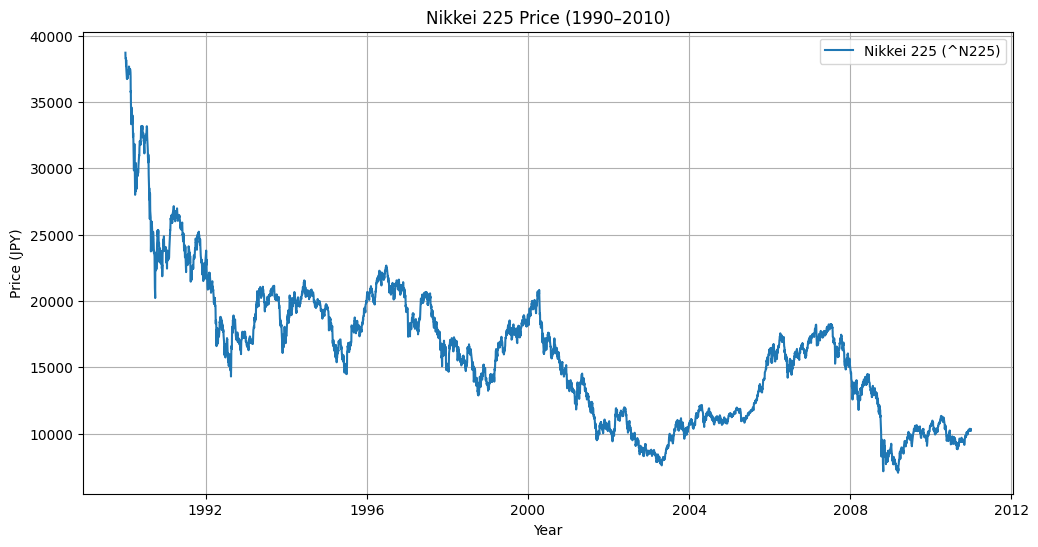

In [43]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Nikkei 225 data (auto-adjusted Close)
nikkei = yf.download("^N225", start="1990-01-01", end="2010-12-31", auto_adjust=True)

# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(nikkei['Close'], label="Nikkei 225 (^N225)")
plt.title("Nikkei 225 Price (1990–2010)")
plt.xlabel("Year")
plt.ylabel("Price (JPY)")
plt.grid(True)
plt.legend()
plt.show()

This graph compares the total returns of each index and fund, which include both price changes and reinvested dividends, providing a more accurate measure of investment performance over time than price returns alone, since dividends can contribute significantly to long-term growth.

[*********************100%***********************]  1 of 1 completed


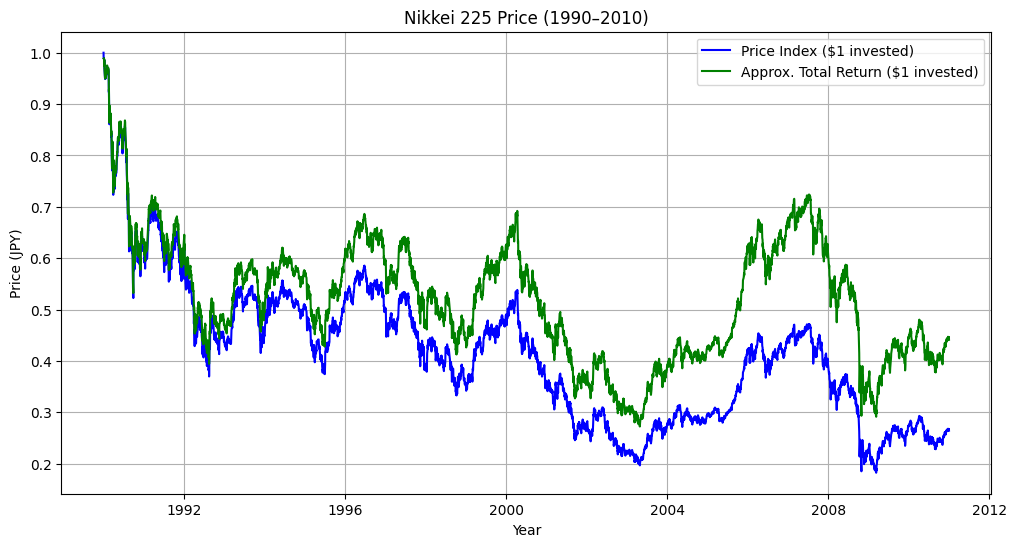

Price Index: $1 in 1990 → $0.26 in 2010
Approximate Total Return: $1 in 1990 → $0.44 in 2010


In [44]:

# Download Nikkei 225 price data
nikkei = yf.download("^N225", start="1990-01-01", end="2010-12-31", auto_adjust=True)

# -------------------------------
# Normalize price to $1 invested
nikkei['Price_1USD'] = nikkei['Close'] / nikkei['Close'].iloc[0]

# Calculate daily returns
nikkei['Daily_Return'] = nikkei['Close'].pct_change()

# -------------------------------
# Approximate total return index
dividend_yield = 0.025  # 2.5% annual dividend
daily_dividend = dividend_yield / 252  # approximate daily yield
nikkei['Total_Return'] = nikkei['Daily_Return'] + daily_dividend
nikkei['Cumulative_Total'] = (1 + nikkei['Total_Return']).cumprod()


plt.figure(figsize=(12, 6))
plt.plot(nikkei['Price_1USD'], color='blue', label="Price Index ($1 invested)")
plt.plot(nikkei['Cumulative_Total'], color='green', label="Approx. Total Return ($1 invested)")
plt.title("Nikkei 225 Price (1990–2010)")
plt.xlabel("Year")
plt.ylabel("Price (JPY)")
plt.grid(True)
plt.legend()
plt.show()

price_end = nikkei['Price_1USD'].iloc[-1]
total_end = nikkei['Cumulative_Total'].iloc[-1]

print(f"Price Index: $1 in 1990 → ${price_end:.2f} in 2010")
print(f"Approximate Total Return: $1 in 1990 → ${total_end:.2f} in 2010")

[*********************100%***********************]  1 of 1 completed


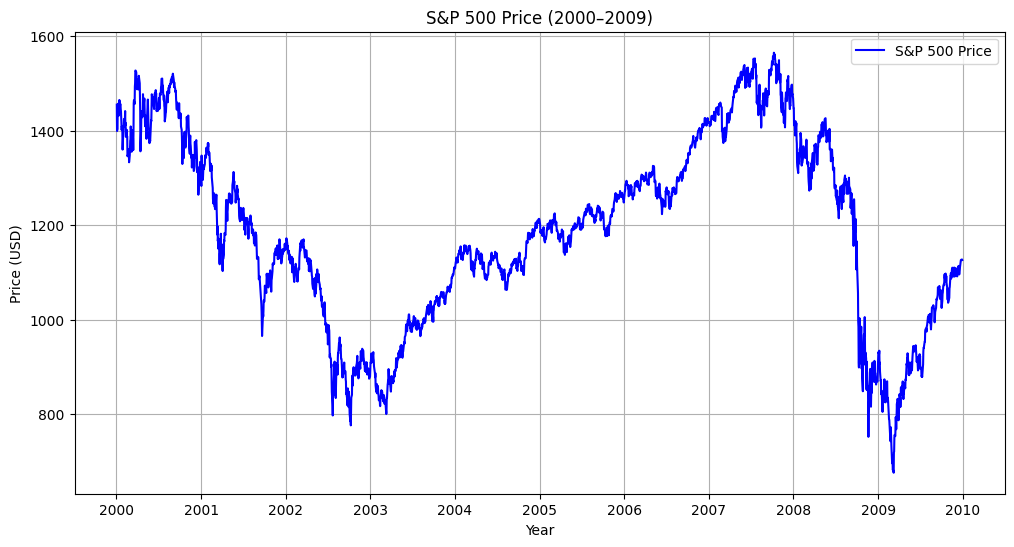

In [45]:
# Download S&P 500 data (2000–2009)
sp500 = yf.download("^GSPC", start="2000-01-01", end="2009-12-31", auto_adjust=True)

# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(sp500['Close'], color='blue', label="S&P 500 Price")
plt.title("S&P 500 Price (2000–2009)")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()

The S&P 500 comparison with dividends.

[*********************100%***********************]  1 of 1 completed


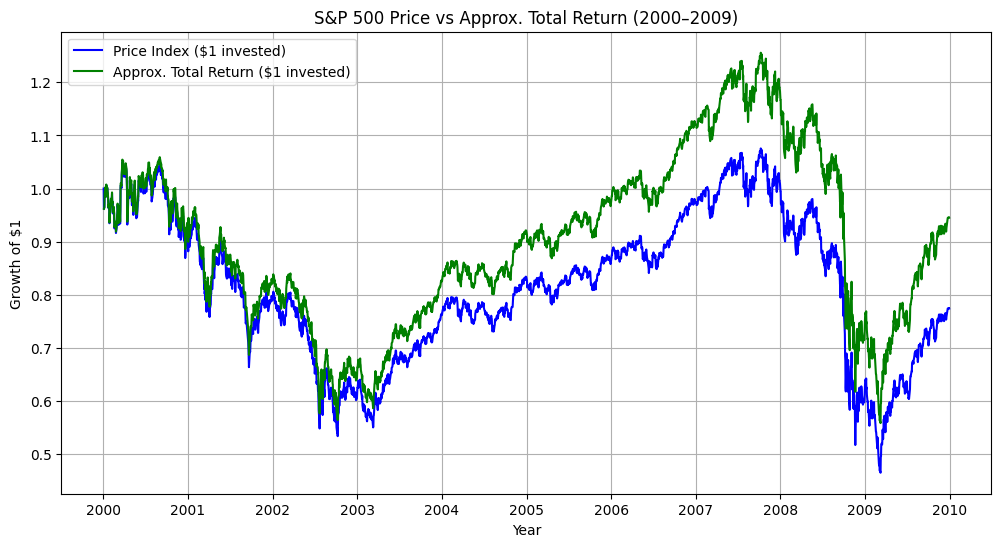

Price Index: $1 in 2000 → $0.77 in 2009
Approximate Total Return: $1 in 2000 → $0.94 in 2009


In [46]:
# Download S&P 500 data (2000–2009)
sp500 = yf.download("^GSPC", start="2000-01-01", end="2009-12-31", auto_adjust=True)

# -------------------------------
# Normalize price to $1 invested
sp500['Price_1USD'] = sp500['Close'] / sp500['Close'].iloc[0]

# Calculate daily returns
sp500['Daily_Return'] = sp500['Close'].pct_change()

# -------------------------------
# Approximate total return index
dividend_yield = 0.02  # 2% annual dividend yield for S&P 500
daily_dividend = dividend_yield / 252  # approximate daily yield
sp500['Total_Return'] = sp500['Daily_Return'] + daily_dividend
sp500['Cumulative_Total'] = (1 + sp500['Total_Return']).cumprod()

# -------------------------------
# Plot both curves
plt.figure(figsize=(12, 6))
plt.plot(sp500['Price_1USD'], color='blue', label="Price Index ($1 invested)")
plt.plot(sp500['Cumulative_Total'], color='green', label="Approx. Total Return ($1 invested)")
plt.title("S&P 500 Price vs Approx. Total Return (2000–2009)")
plt.xlabel("Year")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.legend()
plt.show()

# -------------------------------
# Print end values
price_end = sp500['Price_1USD'].iloc[-1]
total_end = sp500['Cumulative_Total'].iloc[-1]

print(f"Price Index: $1 in 2000 → ${price_end:.2f} in 2009")
print(f"Approximate Total Return: $1 in 2000 → ${total_end:.2f} in 2009")

Global Comparison

[*********************100%***********************]  1 of 1 completed


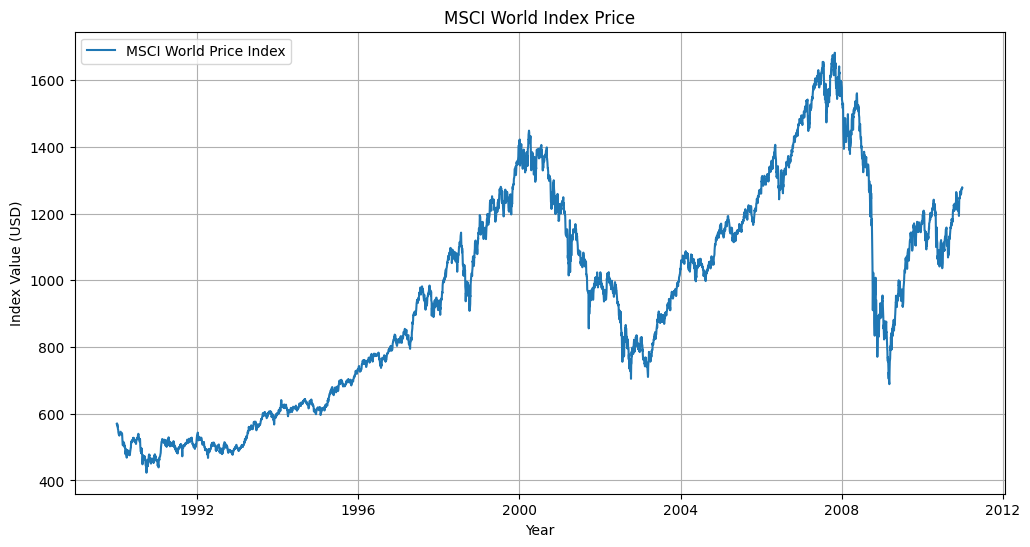

In [47]:
# Download MSCI World Index price data
msci_world = yf.download("^990100-USD-STRD", start="1990-01-01", end="2010-12-31", auto_adjust=True)
msci_world['Price_1USD'] = msci_world['Close'] / msci_world['Close'].iloc[0]

# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(msci_world['Close'], label="MSCI World Price Index")
plt.title(f"MSCI World Index Price")
plt.xlabel("Year")
plt.ylabel("Index Value (USD)")
plt.grid(True)
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


Final $1 values including dividends:
Nikkei (1990–2010): $0.44
MSCI World (1990–2010): $3.44


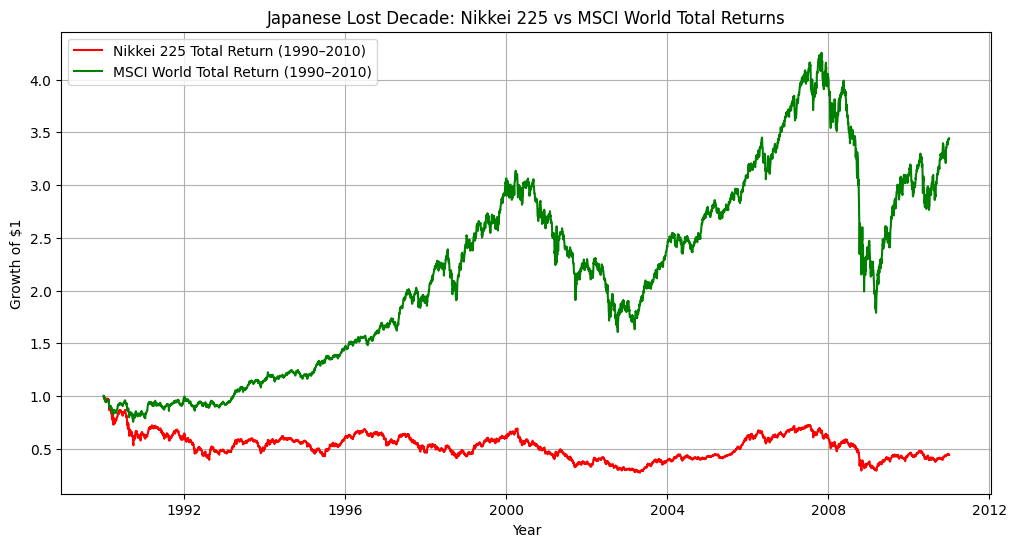

Final $1 values including dividends:
Nikkei (1990–2010): $0.44
MSCI World (1990–2010): $3.44


In [48]:
msci_japan_decade = yf.download("^990100-USD-STRD", start="1990-01-01", end="2010-12-31", auto_adjust=True)
msci_japan_decade['Price_1USD'] = msci_japan_decade['Close'] / msci_japan_decade['Close'].iloc[0]
msci_japan_decade['Daily_Return'] = msci_japan_decade['Close'].pct_change()
dividend_yield_msci = 0.02  # 2% annual
msci_japan_decade['Total_Return'] = msci_japan_decade['Daily_Return'] + dividend_yield_msci / 252
msci_japan_decade['Cumulative_Total'] = (1 + msci_japan_decade['Total_Return']).cumprod()


# Print final $1 values
print("Final $1 values including dividends:")
print(f"Nikkei (1990–2010): ${nikkei['Cumulative_Total'].iloc[-1]:.2f}")
print(f"MSCI World (1990–2010): ${msci_japan_decade['Cumulative_Total'].iloc[-1]:.2f}")


# -------------------------------
# Japanese Lost Decade (1990–2010)
plt.figure(figsize=(12, 6))
plt.plot(nikkei['Cumulative_Total'], label="Nikkei 225 Total Return (1990–2010)", color='red')
plt.plot(msci_japan_decade['Cumulative_Total'], label="MSCI World Total Return (1990–2010)", color='green')
plt.title("Japanese Lost Decade: Nikkei 225 vs MSCI World Total Returns")
plt.xlabel("Year")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.legend()
plt.show()

# -------------------------------
# Optional: Print final $1 values for each
print("Final $1 values including dividends:")
print(f"Nikkei (1990–2010): ${nikkei['Cumulative_Total'].iloc[-1]:.2f}")
print(f"MSCI World (1990–2010): ${msci_japan_decade['Cumulative_Total'].iloc[-1]:.2f}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


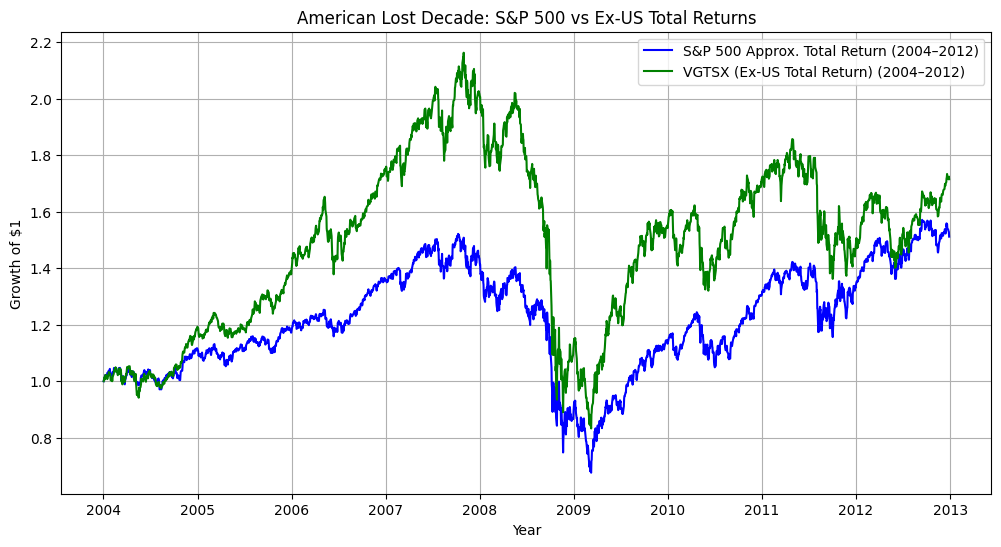

In [49]:

# Set start and end dates
start_date = "2004-01-01"
end_date = "2012-12-31"

# Download S&P 500 price data
sp500_price = yf.download("^GSPC", start=start_date, end=end_date, auto_adjust=False)

# Approximate total return including dividends (assume 2% annual dividend yield)
annual_div_yield = 0.02
daily_div_yield = (1 + annual_div_yield) ** (1/252) - 1  # approximate daily compounding
sp500_price['Daily_Return'] = sp500_price['Adj Close'].pct_change().fillna(0) + daily_div_yield

# Calculate cumulative total return normalized to $1 invested
sp500_price['Cumulative_Total'] = (1 + sp500_price['Daily_Return']).cumprod()

# Download VGTSX (ex-US total return)
vgtsx = yf.download("VGTSX", start=start_date, end=end_date, auto_adjust=True)
vgtsx['Normalized'] = vgtsx['Close'] / vgtsx['Close'].iloc[0]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(sp500_price['Cumulative_Total'], label=f"S&P 500 Approx. Total Return ({start_date[:4]}–{end_date[:4]})", color='blue')
plt.plot(vgtsx['Normalized'], label=f"VGTSX (Ex-US Total Return) ({start_date[:4]}–{end_date[:4]})", color='green')
plt.title("American Lost Decade: S&P 500 vs Ex-US Total Returns")
plt.xlabel("Year")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.legend()
plt.show()